<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 01**  
**┗ Equipment Fault Diagnosis and Prediction Using Sensor Data**
---
> **Context**

* Understand the Problem and Explore the Data
* Define the Problem-Solving Process
* 🥉Session 1 - 「Defining Abnormalities and Performing Data EDA」
* 🥈Session 2 - 「Rule-Based Fault Diagnosis」
* 🥇Session 3 - 「Machine Learning-Based Fault Detection and Prediction」

In [23]:

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/part3_lecture_fastcampus/chapter01_센서 데이터 활용 장비 이상진단 및 예측')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter01' ← 변경X
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/DA portfolio/part3_lecture_fastcampus/chapter01_센서 데이터 활용 장비 이상진단 및 예측'

## **Understanding the Problem and Exploring the Data**

> Add blockquote


---
> **Scenario 👷 (Product Designer, Equipment Operator)**

```
Factory A has recently been struggling due to issues with newly installed equipment.
The frequent breakdowns of the new machinery are causing production schedule delays.
Due to the nature of the equipment, a single failure halts the entire production line, making it a bottleneck in the process.
Since such failures result in significant losses, the company aims to detect early warning signs of malfunction and conduct inspections in advance to minimize the impact of these breakdowns.
```  

> **Data Overview**

* Four collision sensors (S1~S4) were installed at specific points on the equipment to detect abnormal behavior.
* When a collision occurs at those locations, the mass (M) and velocity (V) at the time of the impact are recorded.
* If the equipment receives a shock exceeding a certain threshold (M × V), it comes to a stop.


In [24]:
# ▶ Data read
import pandas as pd
df_features = pd.read_csv('chapter01_abnormal_features.csv')
df_target = pd.read_csv('chapter01_abnormal_target.csv')

In [25]:
df_features.head(5)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


In [26]:
df_target.head(5)

,id,X,Y,M,V
0,0,0.0,-400.0,50.0,0.4
1,1,400.0,0.0,100.0,1.0
2,2,-300.0,-200.0,25.0,0.4
3,3,200.0,-100.0,150.0,0.4
4,4,-300.0,-100.0,150.0,0.4


🔍 Data Structure
* The df_features dataset contains values from sensors S1 to S4 collected over time (Time column).
* The df_target dataset records the final impact values delivered to the equipment — specifically the mass (M) and velocity (V) during the collision.

## **Defining the Problem-Solving Process**
---
> **Problem Definition**

```
▶ Equipment failures cause:

Line stops
Production schedule delays
Revenue loss
Decreased operating profit

```  

> **Expected Outcomes**

```
▶ By detecting early signs of malfunction and performing preventive maintenance:

Reduce unexpected line stops
Normalize the production schedule
```

> **Solution Approach**

```
▶ Define early abnormalities based on sensor data and monitor them in real time.
▶ Session 1 🥉
 - Define early symptoms before a failure occurs
▶ Session 2 🥈
 - Use field experience and domain knowledge for rule-based abnormality detection 이상진단
▶ Session 3 🥇
 - Predict abnormal symptoms through machine learning modeling

```

> **Measuring Effectiveness**  

```
▶ Compare production output and the number of line stops before and after implementing abnormality monitoring.
```

> **Real-World Implementation**  

```
▶ Build a real-time sensor data collection and database storage system
▶ Deploy the trained model on a server and run it periodically
▶ Display results on a dashboard or BI system for monitoring
```

> **Key Code Preview**  

```
▶ session 1 → unique(), value_counts()
▶ session 2 → sns.scatterplot(), plt.axhline(), np.where
▶ session 3 → RandomForestClassifier, classification_report, GridSearchCV
```

## **🥉Session 1**  
**┗  Defining Abnormalities and Performing Data EDA**  
---


### · Data Preprocessing  
---
* Check the basic properties of the collected data:  

  (1) Data shape(dimensions)

  (2) Data type

  (3) Null values (i.e., missing data)

  (4) Outliers (data points outside the normal range)

In [27]:
# ▶ Data shape
# ▶ The number of rows in the feature dataset and the target dataset is different.
print('df_features', df_features.shape)
print('df_target', df_target.shape)

df_features (1050000, 6)
df_target (2800, 5)


In [28]:
# ▶ Data type
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1050000 non-null  int64  
 1   Time    1050000 non-null  float64
 2   S1      1050000 non-null  float64
 3   S2      1050000 non-null  float64
 4   S3      1050000 non-null  float64
 5   S4      1050000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 48.1 MB


In [29]:
# ▶ data
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2800 non-null   int64  
 1   X       2800 non-null   float64
 2   Y       2800 non-null   float64
 3   M       2800 non-null   float64
 4   V       2800 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 109.5 KB


In [30]:
# ▶ Null value
print(df_features.isnull().sum())
print('')
print(df_target.isnull().sum())

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64

id    0
X     0
Y     0
M     0
V     0
dtype: int64


In [31]:
# ▶ Unique한 ID 개수 확인
# ▶ datasets have the same number of unique IDs, which suggests that multiple sensor readings are collected per ID in the feature dataset.
print('df_features_unique_id :', len(df_features['id'].unique()))
print('df_target_unique_id :', len(df_target['id'].unique()))

df_features_unique_id : 2800
df_target_unique_id : 2800


In [32]:
# ▶ For each ID (i.e., product), sensor data from S1 to S4 is collected at intervals of 0.000004 seconds.
df_features[df_features['id']==0].head(5)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


In [33]:
# ▶ To match the dimensions of the target dataset, the mean of the sensor values per ID is used.
df_features_proc = df_features.groupby('id').mean()

In [34]:
df_features.groupby('id').mean()

,Time,S1,S2,S3,S4
id,,,,,
0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893
1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221
2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340
3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867
4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287
...,...,...,...,...,...
2795,0.000748,5600.614397,5885.824925,-6380.192826,-7357.437798
2796,0.000748,-1215.328099,2702.879683,805.983784,-2876.150150
2797,0.000748,436.239993,276.327514,951.805606,-903.193922


In [35]:
print('df_features', df_features_proc.shape)
print('df_target', df_target.shape)

df_features (2800, 5)
df_target (2800, 5)


In [36]:
# ▶ Data left join
df_merge = pd.merge(df_features_proc, df_target, on='id',how='left')

In [37]:
df_merge.head(5)

,id,Time,S1,S2,S3,S4,X,Y,M,V
0,0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893,0.0,-400.0,50.0,0.4
1,1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221,400.0,0.0,100.0,1.0
2,2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340,-300.0,-200.0,25.0,0.4
3,3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867,200.0,-100.0,150.0,0.4
4,4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287,-300.0,-100.0,150.0,0.4


In [38]:
# ▶  final preprocessed dataset
df_merge=df_merge.drop(['Time', 'X', 'Y'], axis=1)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4


### · Defining "Abnormal" Behavior
---
* Before equipment failure occurs, abnormal behavior must be defined for proactive inspection.
* The goal is to detect early signs so that inspections can be performed before the equipment reaches a critical (abnormal) state.

In [39]:
# Define collision energy as M (mass) × V (velocity)
# Create a new column 'MV' for collision energy
df_merge['MV'] = df_merge['M'] * df_merge['V']
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0


Average collision energy : 60.0


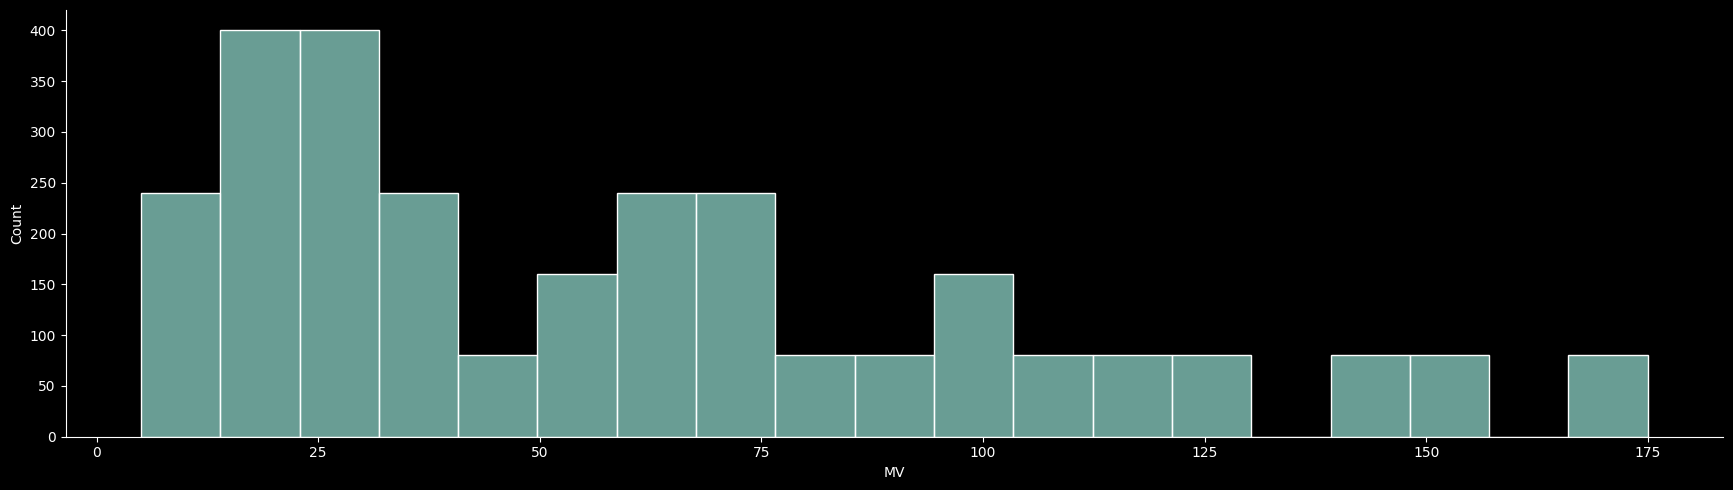

In [40]:
# Check the distribution of collision energy (MV)
# Most data points are distributed around the mean value (~60)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df_merge['MV']);
plt.gcf().set_size_inches(20, 5)
print("Average collision energy :", df_merge['MV'].mean())

In [42]:
# Define abnormal collisions as those above mean + 2 standard deviations
# This is a common method when no industry standard is available
import numpy as np
df_merge['abnormal'] =  np.where(df_merge['MV'] > df_merge['MV'].mean() + 2*df_merge['MV'].std(), 1, 0)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0


In [43]:
# ▶ abnormal data distribution
df_merge['abnormal'].value_counts()

,count
abnormal,
0,2640
1,160


In [44]:
# ≈ 6.06%
(160/2640)*100

6.0606060606060606

## **🥈Session 2**  
**┗ Rule-Based Fault Diagnosis**  
---


### · Analysing the Timing of Abnormal Events
---
* Once abnormal conditions are defined, the next step is to explore how sensor data behaves at those abnormal moments.

* For each sensor (S1 to S4), compare the sensor value distributions during:
  Abnormal state (label = 1)
  Normal state (label = 0)

In [45]:
# Compare average sensor values between abnormal and normal conditions
print("abnormal :",df_merge[df_merge['abnormal']==1]['S1'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S1'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S2'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S2'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S3'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S3'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S4'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S4'].mean())

abnormal : -910.6725618222317 / normal :  -374.457459218389
abnormal : -910.6725618222324 / normal :  -374.45745931738884
abnormal : -3662.427652993808 / normal :  -1193.247454043241
abnormal : -4473.323652485669 / normal :  -1431.8663172477716


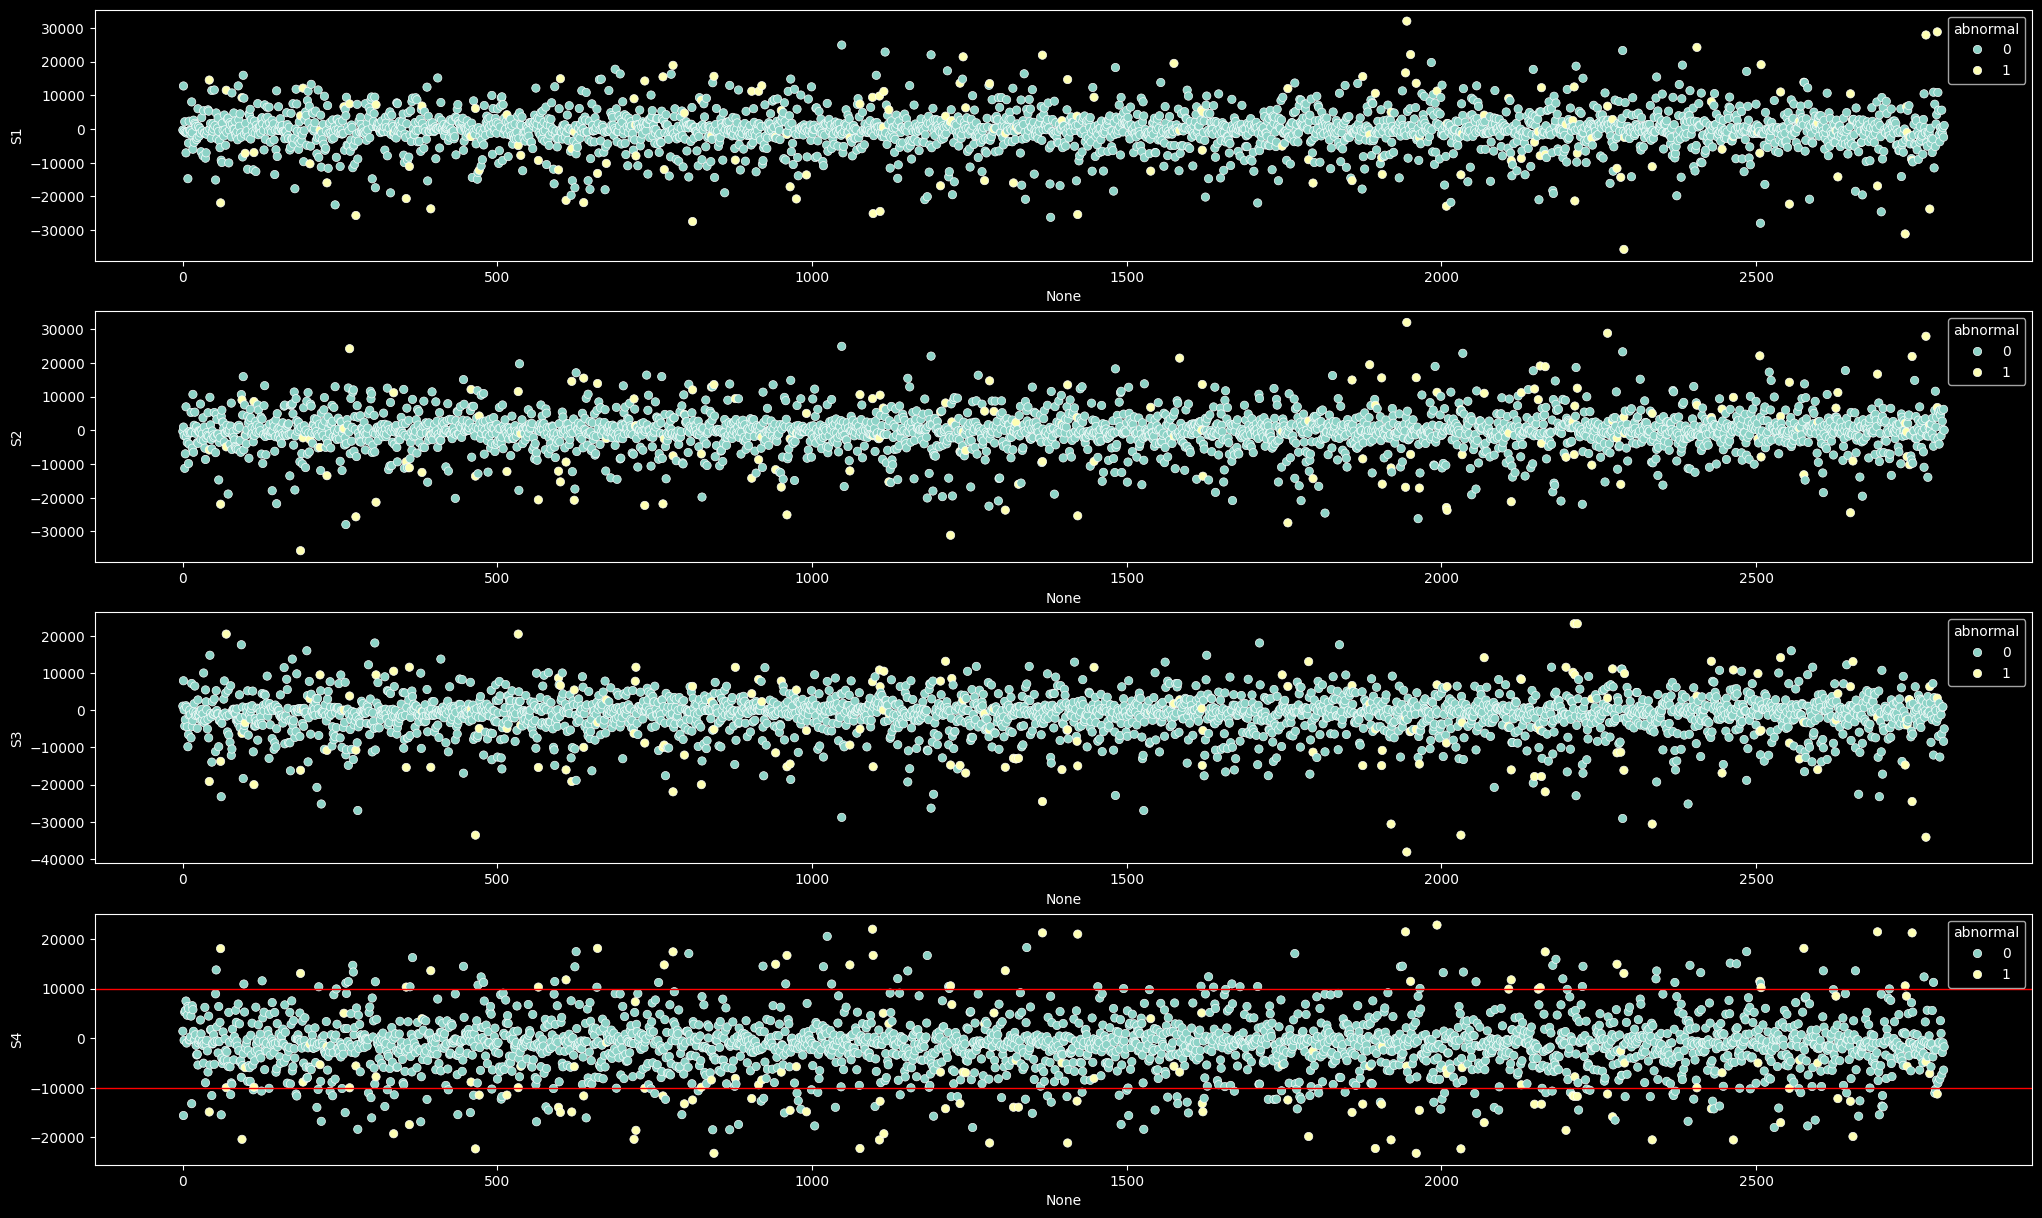

In [46]:
# Sensor values that deviate further from the center (mean) show more abnormalities
fig, axes = plt.subplots(4, 1)
sns.scatterplot(x=df_merge.index, y=df_merge['S1'], hue = df_merge['abnormal'], ax=axes[0]);
sns.scatterplot(x=df_merge.index, y=df_merge['S2'], hue = df_merge['abnormal'], ax=axes[1]);
sns.scatterplot(x=df_merge.index, y=df_merge['S3'], hue = df_merge['abnormal'], ax=axes[2]);
sns.scatterplot(x=df_merge.index, y=df_merge['S4'], hue = df_merge['abnormal'], ax=axes[3]);
plt.axhline(y=10000, color='r', linewidth=1)
plt.axhline(y=-10000, color='r', linewidth=1)
plt.gcf().set_size_inches(25, 15)

### · Rule based Fault Diagnosis
---
* From the scatter plots, we see that when sensor values exceed ±10,000, abnormality occurs more frequently — well above the average abnormal rate of 6%.

In [52]:
# Check abnormal rate when sensor S1 exceeds ±10,000
df_s1 = df_merge[(df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)]
df_s1_abnormal_ratio = (len(df_s1[df_s1['abnormal']==1]) / len(df_s1)) * 100
df_s1_abnormal_ratio

26.978417266187048

In [48]:
# ▶ S2 abnormal rate
df_s2 = df_merge[(df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)]
df_s2_abnormal_ratio = (len(df_s2[df_s2['abnormal']==1]) / len(df_s2)) * 100
df_s2_abnormal_ratio

26.978417266187048

In [50]:
# ▶ S3 abnormal rate
df_s3 = df_merge[(df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)]
df_s3_abnormal_ratio = (len(df_s3[df_s3['abnormal']==1]) / len(df_s3)) * 100
df_s3_abnormal_ratio

28.627450980392155

In [51]:
# ▶ S4 abnormal rate
df_s4 = df_merge[(df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)]
df_s4_abnormal_ratio = (len(df_s4[df_s4['abnormal']==1]) / len(df_s4)) * 100
df_s4_abnormal_ratio

31.333333333333336

In [53]:
# If any sensor value exceeds ±10,000 → Predict as abnormal
df_merge['rule_base1'] = np.where( ((df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)) , 1, 0)
df_merge['rule_base2'] = np.where( ((df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)) , 1, 0)
df_merge['rule_base3'] = np.where( ((df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)) , 1, 0)
df_merge['rule_base4'] = np.where( ((df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)) , 1, 0)

In [54]:
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0


In [55]:
# ▶ Precision: The proportion of predicted abnormal cases that were actually abnormal (i.e., how accurate the positive predictions are).
# ▶ Recall: The proportion of actual abnormal cases that were correctly predicted (i.e., how well the model finds all positives).
# ▶ Using Sensor S4 as the basis for rule-based prediction yielded the best recall score (0.59) among all sensors.
from sklearn.metrics import classification_report
print(classification_report(df_merge['abnormal'], df_merge['rule_base1']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base2']))
print(classification_report(df_merge['abnormal'], df_merge['rule_base3']))
print(classification_report(df_merge['abnormal'], df_merge['rule_base4']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2640
           1       0.29      0.46      0.35       160

    accuracy                           0.90      2800
   macro avg       0.63      0.69      0.65      2800
weighted avg       0.93      0.90      0.91      2800

              prec

## **🥇Session 3**  
**┗  Abnormality Detection & Prediction Using Machine Learning**  
---

### · Preparing Data for Modeling
---
* To build a machine learning model, the dataset must be divided into:
Features (X): The input variables used for prediction
Target (Y): The value we want to predict (in this case, whether the instance is abnormal)

* the data is split into training and test sets for model training and evaluation.


In [56]:
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0


In [57]:
# ▶ stage where we separate the features (X) from the target variable (Y) in preparation for modeling.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df_merge.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_merge['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 4)
(1960,)
(840, 4)
(840,)


### · Model Training and Evaluation
---
* Train the model and make predictions to evaluate performance.

In [58]:
# ▶ Model training
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

# ▶ Preditcion
# ▶ Predict using both training and test data to evaluate performance (helps check for overfitting)
y_pred_train = rfc.predict(x_train)
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      1.00      1.00       112

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       792
           1       0.76      0.40      0.52        48

    accuracy                           0.96       840
   macro avg       0.86      0.69      0.75       840
weighted avg       0.95      0.96      0.95       840



### · Hyperparameter Tuning
---
* Adjust options to improve model performance.

In [59]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

# ▶ Create RandomForestClassifier object and perform GridSearchCV
rf_clf = RandomForestClassifier(random_state = 123456, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='recall')
grid_cv.fit(x_train, y_train)

print('Best hyperparameters: ', grid_cv.best_params_)
print('Best prediction recall score: {:.4f}'.format(grid_cv.best_score_))

Best hyperparameters:  {'max_depth': 12, 'n_estimators': 400}
Best prediction recall score: 0.4727


In [60]:
# ▶ Retrain with best score parameters
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state = 123456)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1848
           1       1.00      0.88      0.93       112

    accuracy                           0.99      1960
   macro avg       1.00      0.94      0.96      1960
weighted avg       0.99      0.99      0.99      1960

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       792
           1       0.78      0.38      0.51        48

    accuracy                           0.96       840
   macro avg       0.87      0.68      0.74       840
weighted avg       0.95      0.96      0.95       840



In [61]:
pd.Series(y_pred_train).value_counts()

,count
0,1862
1,98


### · Identifying Important Variables
---
* Identify key features through Feature Importance analysis.

In [62]:
x_train.columns

Index(['S1', 'S2', 'S3', 'S4'], dtype='object')

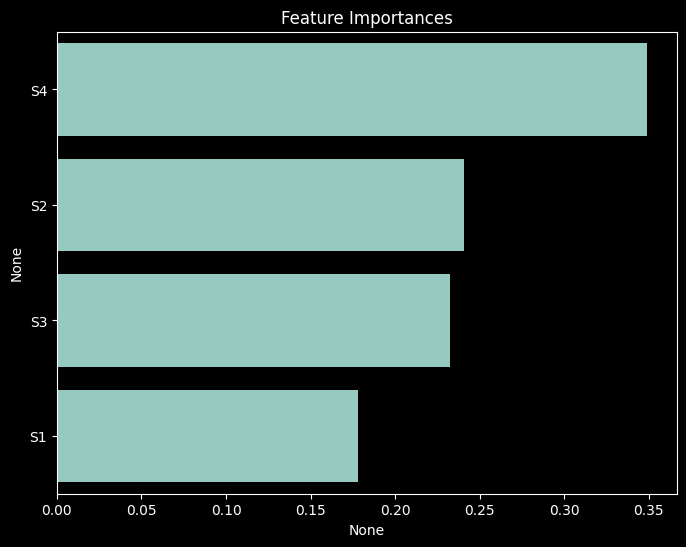

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Adding New Variables
---
* Explore additional variables to improve model performance.

In [64]:
df_new=df_merge.copy()

# ▶ square
df_new['S1_2']=df_new['S1']*df_new['S1']
df_new['S2_2']=df_new['S2']*df_new['S2']
df_new['S3_2']=df_new['S3']*df_new['S3']
df_new['S4_2']=df_new['S4']*df_new['S4']

# ▶ multiply
#df_new['s1*s2']=df_new['S1']*df_new['S2']
#df_new['s2*s3']=df_new['S2']*df_new['S3']
#df_new['s3*s4']=df_new['S3']*df_new['S4']

df_new.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4,S1_2,S2_2,S3_2,S4_2
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0,9.505170e+04,9.505170e+04,1.253291e+06,1.989518e+06
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1,1.633329e+08,9.638896e+05,6.325071e+07,2.428846e+08
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0,4.546665e+05,2.482774e+06,1.888707e+04,1.657242e+05
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0,4.683835e+06,1.271195e+08,1.782307e+07,2.747176e+07
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0,9.613422e+05,4.853787e+07,6.531842e+06,3.132564e+07


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df_new.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_new['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 8)
(1960,)
(840, 8)
(840,)


In [66]:
# ▶ learning
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=123456)
rfc.fit(x_train, y_train)

# ▶ prediciton
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      0.95      0.97       112

    accuracy                           1.00      1960
   macro avg       1.00      0.97      0.99      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       792
           1       0.83      0.31      0.45        48

    accuracy                           0.96       840
   macro avg       0.90      0.65      0.72       840
weighted avg       0.95      0.96      0.95       840



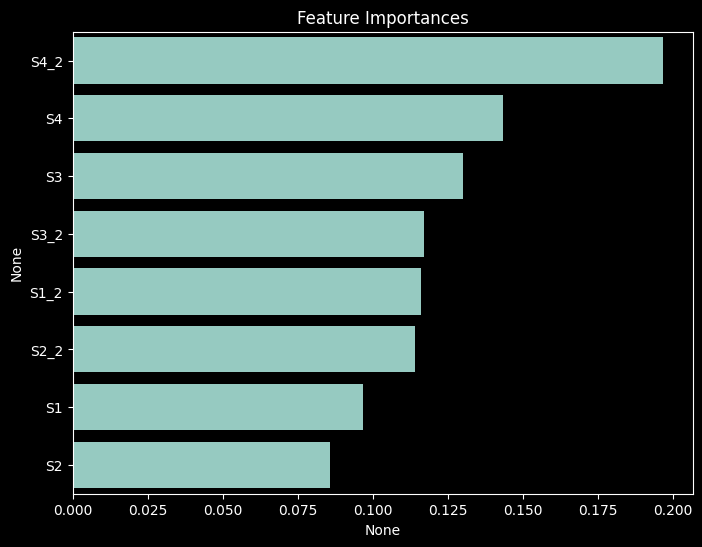

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Model Save and Load
---
* Save the final model and reload it later.

In [68]:
import pickle
# Save model
saved_model = pickle.dumps(rfc)

# Load model
clf_from_pickle = pickle.loads(saved_model)